<a href="https://colab.research.google.com/github/Jo-009/ML_CA/blob/Ver.2/ML_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CA Specifications
1. A Fruits dataset is provided for this project, and it has images of (1) 
   apples, (2)oranges, (3) bananas and (4) a mix of apples, oranges and 
   bananas.
2. Your task is to implement a CNN to recognize the 4 classes accurately.
3. Use the images in the “train” folder to train your image classifier.
4. Then, test the accuracy of your image classifier using images from the 
   “test” folder.
5. Document all your experiments and results. For example, what was done to
   increase the accuracy of your image classifier (e.g. image augmentation).
6. Use Matplotlib to produce any plots that help the reader understand your
   work better.
   
### Submission
The deadline for this project is <b>28 Nov 2021, 6pm</b>.
Please name your submission as <Your_Team_Number><A_or_B>.ipynb. For
example, if you are in Team 1A, then your filename should be Team1A.ipynb.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image, ImageOps

### Preprocessing and Loading Data

Derive x_train,x_test,x_val,y_train,y_test and y_val 

<b>x_train</b>: Numpy arrays of the images of the training dataset

<b>y_train</b>: Labels of the training dataset

<b>x_test</b>: Numpy arrays of the images of the testing dataset

<b>y_test</b>: Labels of the testing dataset

<b>x_val</b>: Numpy arrays of the images of the validation dataset

<b>y_val</b>: Labels of the validation dataset

In [58]:
train_img_path = '/content/drive/MyDrive/Colab Notebooks/train/'
test_img_path = '/content/drive/MyDrive/Colab Notebooks/test/1/' 

### Testing one img

In [ ]:
# #test one img
# img = Image.open(train_img_path + 'mixed_4.jpg')
# img

In [ ]:
# np_img = np.array(img)
# #plt.imshow(np_img)
# np_img.shape

In [ ]:
# # normalize pixels values to between 0.0 to 1.0
# np_img_norm = np_img / 255
# np_img_norm

In [ ]:
# # crop and resize img
# width, height = img.size
# pad = 20    # pixels

# img_crop = img.crop((pad, pad, width-pad, height-pad))
# img_mod = img_crop.resize((650,650))

# img_mod.size

In [ ]:
# # plot modified img
# plt.subplots(figsize=(2,2))
# plt.imshow(img_mod)

### Load data

In [59]:
train_ds_raw = os.listdir('/content/drive/MyDrive/Colab Notebooks/train/')
test_ds_raw = os.listdir('/content/drive/MyDrive/Colab Notebooks/test/1/')

In [ ]:
train_ds_raw

In [61]:
type(train_ds_raw), len(train_ds_raw)

(list, 480)

### Create X_train

In [112]:
filenames = []
for label in train_ds_raw:
    if label[-3:] == 'xml': 
        continue              # only take jpeg
    else:
        filenames.append(train_img_path + label)

In [113]:
# filenames
len(filenames)

240

### Create y_train label

In [64]:
y_train_label = []

for label in train_ds_raw:
    if label[-3:] == 'xml': 
        continue              #if xml, ignore
    arr = label.split('_')    # else, str manipulation 
    y_train_label.append(arr[0])


In [111]:
#y_train_label
len(filenames), len(y_train_label)

(240, 240)

In [66]:
#labels in str
cat = np.unique(y_train_label)
cat

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

### Create df to visualize datasets

In [67]:
df = pd.DataFrame(columns=['filenames'], data=filenames)

In [68]:
df['y_train_label'] = y_train_label

In [69]:
df

,filenames,y_train_label
0,/content/drive/MyDrive/Colab Notebooks/train/a...,apple
1,/content/drive/MyDrive/Colab Notebooks/train/a...,apple
2,/content/drive/MyDrive/Colab Notebooks/train/a...,apple
3,/content/drive/MyDrive/Colab Notebooks/train/a...,apple
4,/content/drive/MyDrive/Colab Notebooks/train/a...,apple
...,...,...
235,/content/drive/MyDrive/Colab Notebooks/train/o...,orange
236,/content/drive/MyDrive/Colab Notebooks/train/o...,orange
237,/content/drive/MyDrive/Colab Notebooks/train/o...,orange
238,/content/drive/MyDrive/Colab Notebooks/train/o...,orange


In [70]:
img = cv2.imread(filenames[10], cv2.IMREAD_COLOR)
img.shape

(500, 500, 3)

### Plot Histogram to set size of images

In [71]:
# plot histogram
# decide which is the more common size for img
# Getting the dimensions of all the image into a list
dim1 = []
dim2 = []
colors = []

for img_filename in filenames:
    x, y, c = plt.imread(img_filename).shape # height width color
    dim1.append(x)
    dim2.append(y)
    colors.append(c)

In [72]:
dim1 = np.array(dim1)
dim2 = np.array(dim2)
colors = np.array(colors)

In [78]:
dim1.max(), dim2.max(), colors.mean()

(4605, 3160, 3.1083333333333334)

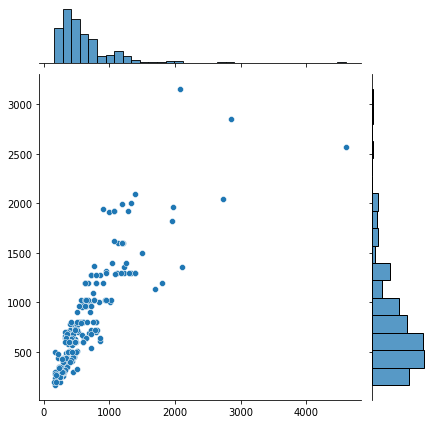

In [77]:
sns.jointplot(x=dim1, y=dim2);

In [76]:
dim1.mean(), dim2.mean()

(633.5083333333333, 789.2166666666667)

resize according to findings:
*Taking the mean of the image size, we set the image size to be 650 by 650 by 3 for easier computation*
**image_size = (650, 650)**

### Resize images to proper and similar size and create x_train

In [ ]:
# test greyscale and resize on 1 img
img = Image.open(filenames[1])
greyscale_img = img.convert('L')
img_resized = greyscale_img.resize((650,650))
img_resized

In [114]:
# x_train = None

# for i in range(len(filenames)):
#     img_raw = Image.open(filenames[i])  
#     greyscale_img = ImageOps.grayscale(img_raw)
#     img_reshaped = greyscale_img.resize((650, 650))   
#     if x_train is None:
#         x_train = img_reshaped
#     else:
#         x_train = np.concatenate((x_train, img_reshaped))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [120]:
x_train = None

for i in range(len(y_train_label)):
    img_raw = cv2.imread(filenames[i], cv2.IMREAD_COLOR)
    img_reshaped = cv2.resize(img_raw,(650, 650), cv2.INTER_NEAREST)
    img_reshaped = cv2.cvtColor(img_reshaped, cv2.COLOR_BGR2RGB)
    if x_train is None:
        x_train = img_reshaped
    else:
        x_train = np.concatenate((x_train, img_reshaped))

Verify data shaped correctly 

In [121]:
x_train = x_train.reshape(-1, 650, 650, 3)
x_train.shape

(240, 650, 650, 3)

Verify that data is shaped correctly by randomly retrieving an individual data to view

In [ ]:
# img2 = Image.fromarray(x_train[1])
# --> bug in scipy so shape can throw error
img2 = np.array(Image.fromarray((x_train[1] * 255).astype(np.uint8)).convert('RGB'))
plt.subplots(figsize=(2,2))
plt.imshow(img2)

**Determine max value of each cell and min before normalizing**

In [123]:
x_train.max(), x_train.min()

(255, 0)

**Normalize dataset**

In [ ]:
x_train = x_train/255
print(x_train)

One-Hot Encoding data using keras to_categorical

In [94]:
n_labels = len(labels)
n_labels

4

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#instantiate one hot encoding
encoder = LabelEncoder()
#fit
encoder.fit(y_train_label)
#transform
data = encoder.transform(y_train_label)
y_train = tf.keras.utils.to_categorical(data)

print(y_train) 

In [126]:
# to vosualize the labels
categories = pd.DataFrame(data=y_train,
                 columns=encoder.classes_)

print(categories)

     apple  banana  mixed  orange
0      1.0     0.0    0.0     0.0
1      1.0     0.0    0.0     0.0
2      1.0     0.0    0.0     0.0
3      1.0     0.0    0.0     0.0
4      1.0     0.0    0.0     0.0
..     ...     ...    ...     ...
235    0.0     0.0    0.0     1.0
236    0.0     0.0    0.0     1.0
237    0.0     0.0    0.0     1.0
238    0.0     0.0    0.0     1.0
239    0.0     0.0    0.0     1.0

[240 rows x 4 columns]


### Defining Model Architecture
Things like: 
- how many convolutional layers do we want
- what should be the activation function for each layer
- how many hidden units should each layer have etc

#### Construct CNN Model

- Create an empty Neural Network via Sequential()
- Add more layers to 'model' obj to turn it into CNN
- First layer--> convolutional layer(filters,kernal_size,activation,input_shape)


In [127]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                                activation = 'relu', 
                                input_shape= (650,650,3)))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),
#                                 activation = 'relu', 
#                                 input_shape= (650,650,3)))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
#                                 activation = 'relu', 
#                                 input_shape= (650,650,3)))
# model pooling, dropout, dense (need to flatten first) 
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512,activation='relu'))
# model.add(tf.keras.layers.Dense(1,activation='sigmoid')) 
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

- When using Softmax as the activation function as the last layer, our loss function should be ‘categorical_crossentropy’
- Optimizers are algorithms to change the weights and the learning rate of our neural network; ‘adam’ is a good choice
- When determining the accuracy of a prediction, use ‘accuracy’ as the metrics as we can count the number of times the neural network has given a correct prediction

In [129]:
#compiling the CNN
# model.compile(optimizer = RMSprop(learning_rate=0.001),
#             loss='categorical_crossentropy', 
#              metrics =['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

Require training images and their corresponding true labels, validation images and their corresponding true labels (we use these labels only to validate the model and not during the training phase). We also define the number of epochs in this step. For starters, we will run the model for 10 epochs (you can change the number of epochs later).

#### can consider using k-means to calculate epochs

In [135]:
x_train = np.array(x_train)
y_train = np.array(y_train)
fitting = model.fit(x=x_train, y=y_train_label, epochs=20)

ValueError: ignored

#### Estimate model's performance and predict classes
- load test data (img) and go through pre-processing 
      # test = pd.read_csv('test.csv')
- read and store all test images
      # test_image = []
      # for i in tqdm(range(test.shape[0])):
      # img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
      # img = image.img_to_array(img)
      # img = img/255
      # test_image.append(img)
      # test = np.array(test_image) -->
- make predictions
      # prediction = model.predict_classes(test)

